In [55]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# prices = quandl.get("BSE/BOM532540", 
#                 authtoken="", 
#                 start_date = '1991-01-01', end_date = '2022-10-11'
#                 )

# prices.to_csv('gbm.csv', index=True)

In [101]:
prices = pd.read_csv('gbm.csv', index_col=0)

In [102]:
prices

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2004-08-25,1076.00,1080.00,979.00,987.50,1004.163872,6536309.0,121534.0,6.563525e+09,1858962.0,28.44,101.00,-88.50
2004-08-26,992.70,996.70,975.30,978.55,985.243466,2243016.0,44222.0,2.209917e+09,497612.0,22.18,21.40,-14.15
2004-08-27,982.45,982.45,958.55,962.35,969.424008,1503317.0,31798.0,1.457352e+09,263508.0,17.53,23.90,-20.10
2004-08-30,967.70,989.75,965.00,986.25,982.607932,1124819.0,23698.0,1.105256e+09,220874.0,19.64,24.75,18.55
2004-08-31,989.00,990.00,976.00,987.95,982.258276,1135066.0,19871.0,1.114928e+09,282277.0,24.87,14.00,-1.05
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-04,3020.00,3097.50,3020.00,3092.50,3079.310000,113230.0,8670.0,3.486704e+08,69848.0,61.69,77.50,72.50
2022-10-06,3103.00,3124.10,3092.50,3104.70,3107.810000,185886.0,14943.0,5.776977e+08,114981.0,61.86,31.60,1.70
2022-10-07,3099.00,3104.85,3059.00,3064.95,3075.370000,190047.0,14607.0,5.844641e+08,140616.0,73.99,45.85,-34.05


In [103]:
prices['Yesterday Close'] = prices['Close'].shift(1)

In [104]:
prices

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Yesterday Close
Date,,,,,,,,,,,,,
2004-08-25,1076.00,1080.00,979.00,987.50,1004.163872,6536309.0,121534.0,6.563525e+09,1858962.0,28.44,101.00,-88.50,NaN
2004-08-26,992.70,996.70,975.30,978.55,985.243466,2243016.0,44222.0,2.209917e+09,497612.0,22.18,21.40,-14.15,987.50
2004-08-27,982.45,982.45,958.55,962.35,969.424008,1503317.0,31798.0,1.457352e+09,263508.0,17.53,23.90,-20.10,978.55
2004-08-30,967.70,989.75,965.00,986.25,982.607932,1124819.0,23698.0,1.105256e+09,220874.0,19.64,24.75,18.55,962.35
2004-08-31,989.00,990.00,976.00,987.95,982.258276,1135066.0,19871.0,1.114928e+09,282277.0,24.87,14.00,-1.05,986.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-04,3020.00,3097.50,3020.00,3092.50,3079.310000,113230.0,8670.0,3.486704e+08,69848.0,61.69,77.50,72.50,2985.70
2022-10-06,3103.00,3124.10,3092.50,3104.70,3107.810000,185886.0,14943.0,5.776977e+08,114981.0,61.86,31.60,1.70,3092.50
2022-10-07,3099.00,3104.85,3059.00,3064.95,3075.370000,190047.0,14607.0,5.844641e+08,140616.0,73.99,45.85,-34.05,3104.70


In [105]:
prices.dropna(inplace=True)

In [106]:
prices

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Yesterday Close
Date,,,,,,,,,,,,,
2004-08-26,992.70,996.70,975.30,978.55,985.243466,2243016.0,44222.0,2.209917e+09,497612.0,22.18,21.40,-14.15,987.50
2004-08-27,982.45,982.45,958.55,962.35,969.424008,1503317.0,31798.0,1.457352e+09,263508.0,17.53,23.90,-20.10,978.55
2004-08-30,967.70,989.75,965.00,986.25,982.607932,1124819.0,23698.0,1.105256e+09,220874.0,19.64,24.75,18.55,962.35
2004-08-31,989.00,990.00,976.00,987.95,982.258276,1135066.0,19871.0,1.114928e+09,282277.0,24.87,14.00,-1.05,986.25
2004-09-01,988.50,994.90,983.50,987.80,989.457592,986320.0,17909.0,9.759218e+08,246817.0,25.02,11.40,-0.70,987.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-04,3020.00,3097.50,3020.00,3092.50,3079.310000,113230.0,8670.0,3.486704e+08,69848.0,61.69,77.50,72.50,2985.70
2022-10-06,3103.00,3124.10,3092.50,3104.70,3107.810000,185886.0,14943.0,5.776977e+08,114981.0,61.86,31.60,1.70,3092.50
2022-10-07,3099.00,3104.85,3059.00,3064.95,3075.370000,190047.0,14607.0,5.844641e+08,140616.0,73.99,45.85,-34.05,3104.70


In [107]:
prices['Split Factor'] = prices['Yesterday Close'] / prices['Open']

In [108]:
prices

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Yesterday Close,Split Factor
Date,,,,,,,,,,,,,,
2004-08-26,992.70,996.70,975.30,978.55,985.243466,2243016.0,44222.0,2.209917e+09,497612.0,22.18,21.40,-14.15,987.50,0.994762
2004-08-27,982.45,982.45,958.55,962.35,969.424008,1503317.0,31798.0,1.457352e+09,263508.0,17.53,23.90,-20.10,978.55,0.996030
2004-08-30,967.70,989.75,965.00,986.25,982.607932,1124819.0,23698.0,1.105256e+09,220874.0,19.64,24.75,18.55,962.35,0.994471
2004-08-31,989.00,990.00,976.00,987.95,982.258276,1135066.0,19871.0,1.114928e+09,282277.0,24.87,14.00,-1.05,986.25,0.997219
2004-09-01,988.50,994.90,983.50,987.80,989.457592,986320.0,17909.0,9.759218e+08,246817.0,25.02,11.40,-0.70,987.95,0.999444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-04,3020.00,3097.50,3020.00,3092.50,3079.310000,113230.0,8670.0,3.486704e+08,69848.0,61.69,77.50,72.50,2985.70,0.988642
2022-10-06,3103.00,3124.10,3092.50,3104.70,3107.810000,185886.0,14943.0,5.776977e+08,114981.0,61.86,31.60,1.70,3092.50,0.996616
2022-10-07,3099.00,3104.85,3059.00,3064.95,3075.370000,190047.0,14607.0,5.844641e+08,140616.0,73.99,45.85,-34.05,3104.70,1.001839


In [109]:
prices['Split Factor'] = prices['Split Factor'].round(1)

In [110]:
prices

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Yesterday Close,Split Factor
Date,,,,,,,,,,,,,,
2004-08-26,992.70,996.70,975.30,978.55,985.243466,2243016.0,44222.0,2.209917e+09,497612.0,22.18,21.40,-14.15,987.50,1.0
2004-08-27,982.45,982.45,958.55,962.35,969.424008,1503317.0,31798.0,1.457352e+09,263508.0,17.53,23.90,-20.10,978.55,1.0
2004-08-30,967.70,989.75,965.00,986.25,982.607932,1124819.0,23698.0,1.105256e+09,220874.0,19.64,24.75,18.55,962.35,1.0
2004-08-31,989.00,990.00,976.00,987.95,982.258276,1135066.0,19871.0,1.114928e+09,282277.0,24.87,14.00,-1.05,986.25,1.0
2004-09-01,988.50,994.90,983.50,987.80,989.457592,986320.0,17909.0,9.759218e+08,246817.0,25.02,11.40,-0.70,987.95,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-04,3020.00,3097.50,3020.00,3092.50,3079.310000,113230.0,8670.0,3.486704e+08,69848.0,61.69,77.50,72.50,2985.70,1.0
2022-10-06,3103.00,3124.10,3092.50,3104.70,3107.810000,185886.0,14943.0,5.776977e+08,114981.0,61.86,31.60,1.70,3092.50,1.0
2022-10-07,3099.00,3104.85,3059.00,3064.95,3075.370000,190047.0,14607.0,5.844641e+08,140616.0,73.99,45.85,-34.05,3104.70,1.0


In [113]:
prices['Split Factor'].loc[(prices['Split Factor'] <= 1.2) & (prices['Split Factor'] >= 0.8), 'Split Factor'] = 1.0

C:\Python310\lib\site-packages\pandas\core\common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


TypeError: unhashable type: 'Series'

<AxesSubplot:xlabel='Date', ylabel='Split Factor'>

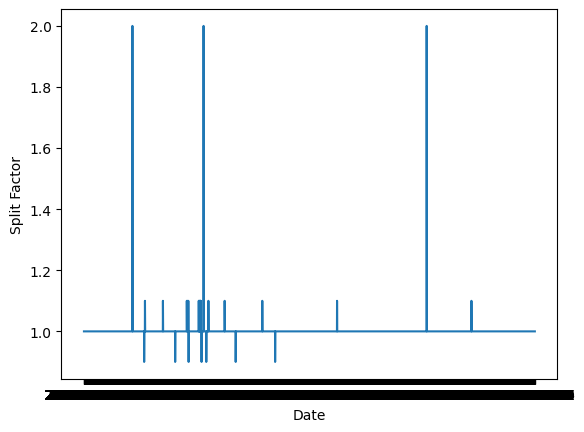

In [111]:
sns.lineplot(prices['Split Factor'])

<AxesSubplot:xlabel='Date', ylabel='WAP'>

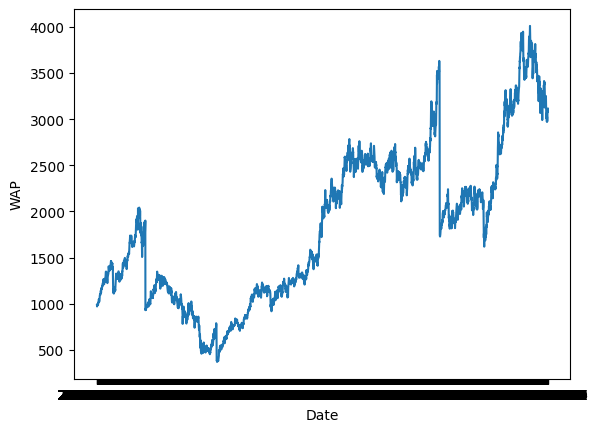

In [112]:
sns.lineplot(prices['WAP'])